In [85]:
from kneed import DataGenerator, KneeLocator
import matplotlib.pyplot as plt
import pandas as pd
import csv
import os
import scipy.io
from scipy.signal import find_peaks
import json
import numpy as np
import pickle
import resync as rs

fs = 160

In [101]:
path = '/auto/data2/eTheremin/ALTAI/ALTAI_20240722_SESSION_01/'

In [80]:
def clean_positions(positions):
    """
    Fonction de nettoyage des positions enregistrées au cours de l'expérience. Pour rappel, une valeur de -1, indique que le sujet n'a pas été détecté par le réseau de neurones.
    :param positions: 
    :return: 
    """
    y = np.where(positions == -1)[0]
    diff_y = np.diff(y)
    diff_y = np.vstack((np.arange(1, len(diff_y) + 1), diff_y)).T
    k = 0
    begin = 0
    for i, elt in diff_y:
        if elt != 1:
            positions[y[i - 1]] = positions[y[i - 1] + 1]
            positions[y[i]] = positions[y[i] - 1]
            if k != 0:
                end = y[i - 1]
                filler = np.full(shape=k, fill_value=positions[begin - 1])
                positions[begin:end] = filler
                k = 0
        else:
            if k == 0:
                begin = y[i - 1]
            k += 1
    remainder = np.where(positions == -1)[0]
    if len(remainder) != 0 and k != 0:
        pass

    return positions

In [102]:
positions = rs.load_positions_file(path)
positions = [file for file in positions if file != ""]


In [103]:
print(positions)
p = positions[0]
# Attention, positions en deux dimensions !
p = np.fromfile(p, dtype=np.int32)
x_p = p[np.arange(0, len(p), step=2)]
y_p = p[np.arange(1, len(p), step=2)]
mapping = rs.Mapping(1920, 33, 2000., 7)
clean_x_p = clean_positions(x_p)  # Pour retirer les -1.

['/auto/data2/eTheremin/ALTAI/ALTAI_20240722_SESSION_01/positions/positions_tracking_00_ALTAI_SESSION_01_20240722.bin']


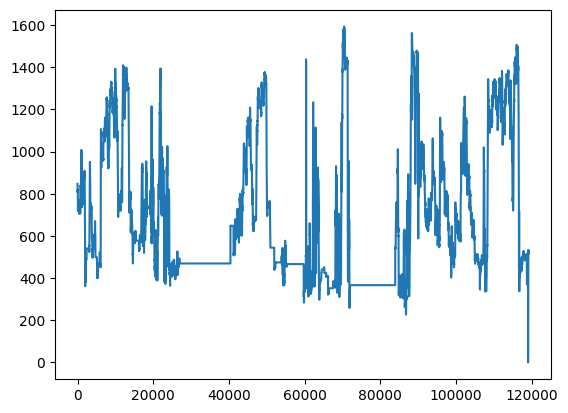

In [104]:
plt.plot(clean_x_p)

In [105]:
len(clean_x_p)/fs


744.475

In [106]:
tt_path = path+'headstage_0/tt.pkl'
with open(tt_path, 'rb') as file:
    tt = pickle.load(file)

tt_positions_path = path+'headstage_0/tt_positions.pkl'
with open(tt_positions_path, 'rb') as file:
    tt_positions = pickle.load(file)


In [107]:
print(len(tt_positions['triggers']),len(tt['triggers']))

1944 1944


In [108]:
tone_vec = mapping.convert_to_frequency(clean_x_p)
d = np.diff(tone_vec)
idx = np.where(d != 0)[0] + 1
trigs= idx/fs
switch = tone_vec[idx]

In [109]:
switch = tone_vec[idx]

print(len(switch))
print(len(tt['tones']))
print(len(tt['triggers']))
print(len(trigs))

1981
1981
1944
1981


In [110]:
analog_trigs = np.array(tt['triggers'])/30000
pos_trigs = trigs

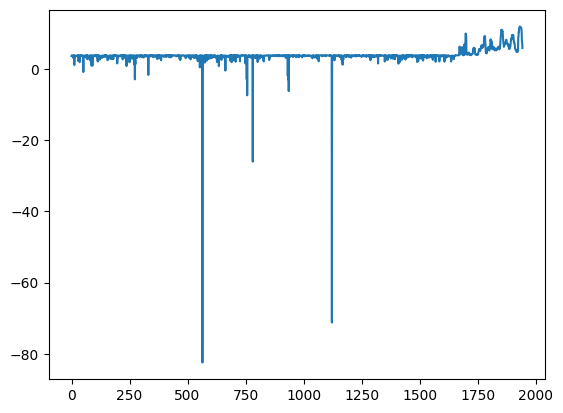

In [111]:
delta_trigs = []
for i in range(len(analog_trigs)):
    delta_trigs.append((analog_trigs[i]-pos_trigs[i]))
plt.plot(delta_trigs)

In [112]:
delta_average = np.nanmean(delta_trigs)
pos_trigs_recalé = pos_trigs + delta_average

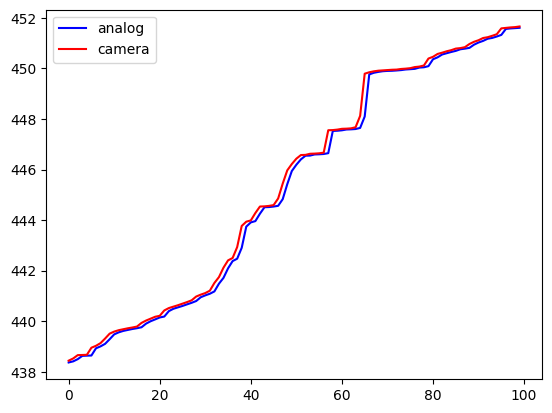

In [115]:
plt.plot(analog_trigs[1000:1100], c = 'b', label = 'analog')
plt.plot(pos_trigs_recalé[1000:1100], c='red', label = 'camera')
plt.legend()

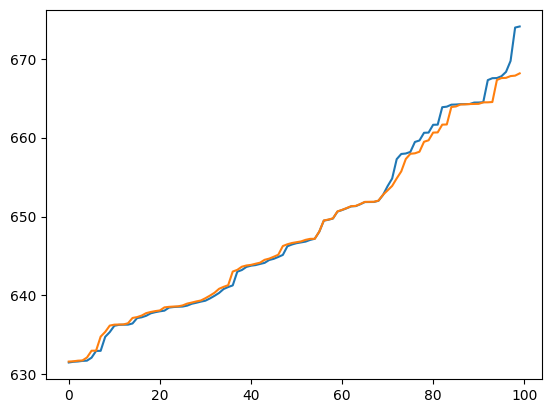

In [116]:
plt.plot(analog_trigs[1600:1700])
plt.plot(pos_trigs_recalé[1600:1700])

In [117]:
new_tt = {
        'tones': switch,
        'triggers': pos_trigs_recalé*30000,
        'block': np.zeros(len(trigs)), 
        'condition' : np.zeros(len(trigs)),
        'mock_triggers' : np.zeros(len(trigs)),
        'mock_tones' : np.zeros(len(trigs))
    }

In [120]:
with open(path+'headstage_0/tt_positions.pkl', 'wb') as file:
    pickle.dump(new_tt, file)

OSError: [Errno 28] No space left on device

In [74]:
dig_in = np.load(path + 'headstage_0/dig_in.npy')

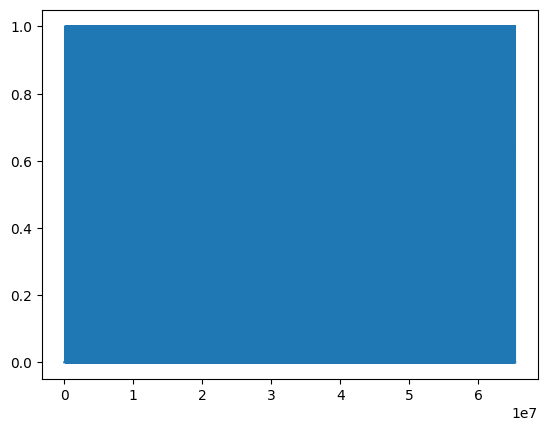

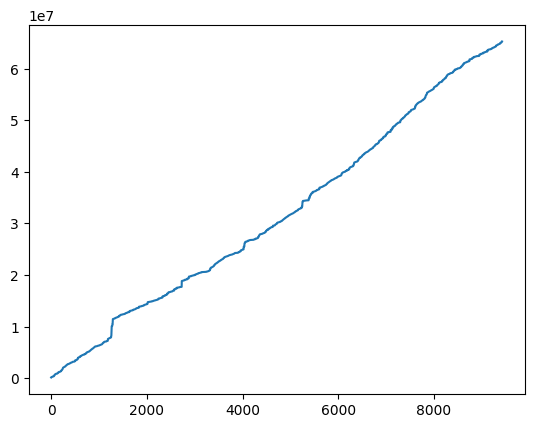

In [17]:
plt.plot(tt['triggers'])

In [18]:
new_tt = {
        'tones': switch,
        'triggers': trigs*30000,
        'block': np.zeros(len(trigs)), 
        'condition' : np.zeros(len(trigs)),
        'mock_triggers' : np.zeros(len(trigs)),
        'mock_tones' : np.zeros(len(trigs))
    }

In [19]:
new_tt

{'tones': array([1727., 2000., 2317., ...,  715.,  828.,  715.]),
 'triggers': array([3.74250000e+03, 2.69925000e+04, 5.98050000e+04, ...,
        6.50868675e+07, 6.50870550e+07, 6.50889300e+07]),
 'block': array([0., 0., 0., ..., 0., 0., 0.]),
 'condition': array([0., 0., 0., ..., 0., 0., 0.]),
 'mock_triggers': array([0., 0., 0., ..., 0., 0., 0.]),
 'mock_tones': array([0., 0., 0., ..., 0., 0., 0.])}

In [20]:
with open(path+'headstage_0/tt_positions.pkl', 'wb') as file:
        pickle.dump(new_tt, file)


In [21]:
tt_path = path+'headstage_0/tt.pkl'
with open(tt_path, 'rb') as file:
    tt = pickle.load(file)

In [22]:
tt['triggers']

[152577,
 156097,
 179337,
 212137,
 222657,
 225457,
 229257,
 241777,
 243657,
 244977,
 247057,
 249457,
 253257,
 256617,
 261817,
 262017,
 262257,
 280257,
 285817,
 287497,
 289257,
 290137,
 290937,
 291657,
 292777,
 294097,
 295257,
 295977,
 296737,
 297297,
 298057,
 298777,
 300097,
 323577,
 327297,
 346617,
 360817,
 361257,
 361777,
 362737,
 363297,
 365937,
 366097,
 366457,
 366657,
 368337,
 368577,
 370777,
 371137,
 377937,
 378097,
 379977,
 380137,
 381457,
 385777,
 386937,
 394977,
 450297,
 451977,
 454017,
 454417,
 457017,
 477297,
 528657,
 535417,
 537297,
 537817,
 538257,
 538417,
 557137,
 560577,
 651297,
 656137,
 658977,
 666657,
 666817,
 667417,
 684097,
 690297,
 710337,
 719137,
 721617,
 724017,
 773737,
 775417,
 775617,
 781617,
 788337,
 804817,
 811617,
 820617,
 823617,
 834657,
 834817,
 840457,
 847256,
 856256,
 856776,
 856976,
 858296,
 860576,
 861696,
 864096,
 865976,
 867096,
 869496,
 869936,
 870656,
 871776,
 872736,
 873096,
 

In [23]:
print(len(tt['tones']))
print(len(switch))

9504
9503


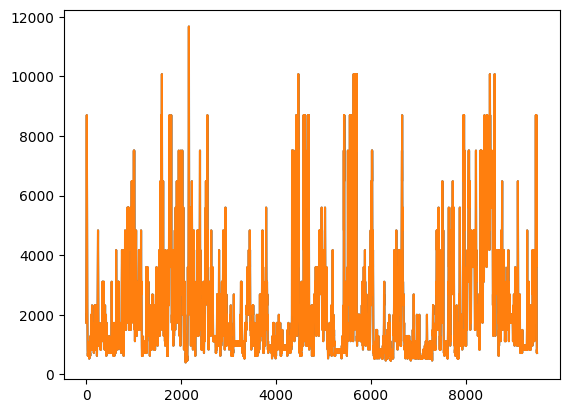

In [24]:
plt.plot(tt['tones'])
plt.plot(switch)

In [25]:

def detect_frequency_switch(vec, mapping, mock_tones):
    """
    Fonction qui a pour objectif de détecter les changements de fréquences.
    :param mapping:
    :param vec:
    :param mock_tones:
    :return:
    """
    # print(np.unique(vec))
    tone_vec = mapping.convert_to_frequency(vec)
    d = np.diff(tone_vec)
    idx = np.where(d != 0)[0] + 1
    switch = tone_vec[idx]
    return switch

In [26]:
trigg=s

NameError: name 's' is not defined

In [18]:
tones_from_positions = rs.detect_frequency_switch(positions, mapping, None)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices